In [11]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Packages
import pycountry_convert as pc
import plotly_express as px
import warnings
warnings.filterwarnings("ignore")

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data= pd.read_csv('/content/drive/MyDrive/Dataset/Height of Male and Female by Country 2022.csv')
data.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


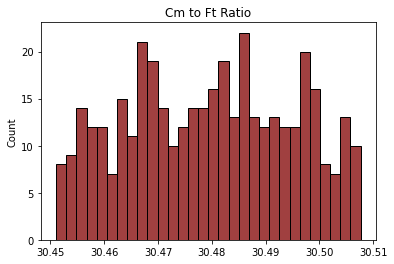

In [15]:
# I''ll check whether the height records in Cm and Ft metrics are consistent 🦑
Male_Cm_Ft_ratio = data['Male Height in Cm'].values / data['Male Height in Ft'].values
Female_Cm_Ft_ratio = data['Female Height in Cm'].values / data['Female Height in Ft'].values
Cm_Ft_ratio= list(Male_Cm_Ft_ratio)+ list(Female_Cm_Ft_ratio)
# Ploting to see whether the ratios are the same for all records (for both Male and Female)
fig, ax= plt.subplots(figsize=(6,4))
sns.histplot(Cm_Ft_ratio, bins=30, color='maroon', edgecolor='black', ax=ax)
ax.set_title('Cm to Ft Ratio');

In [16]:
# Drop any duplicate records 🐍
data.drop_duplicates(subset='Country Name', inplace=True)
# For simplicity, I will use only 1 metric for height (cm) 🦊
data.drop(['Male Height in Ft','Female Height in Ft'], axis=1, inplace=True)
data.head(3)

,Rank,Country Name,Male Height in Cm,Female Height in Cm
0,1,Netherlands,183.78,170.36
1,2,Montenegro,183.30,169.96
2,3,Estonia,182.79,168.66


In [17]:
# Data shape and attributes 🦂
display(data.shape, data.columns)

(199, 4)

Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm'], dtype='object')

In [18]:
# Lets inspect the missing values 🐝
data_info= pd.DataFrame()
data_info['column']= data.columns
data_info['type']= data.dtypes.tolist()
data_info['num_NA']= data_info['column'].apply(lambda x: data[x].isna().sum())
data_info['%_NA']= data_info['column'].apply(lambda x: data[x].isna().mean())
data_info

,column,type,num_NA,%_NA
0,Rank,int64,0,0.0
1,Country Name,object,0,0.0
2,Male Height in Cm,float64,0,0.0
3,Female Height in Cm,float64,0,0.0


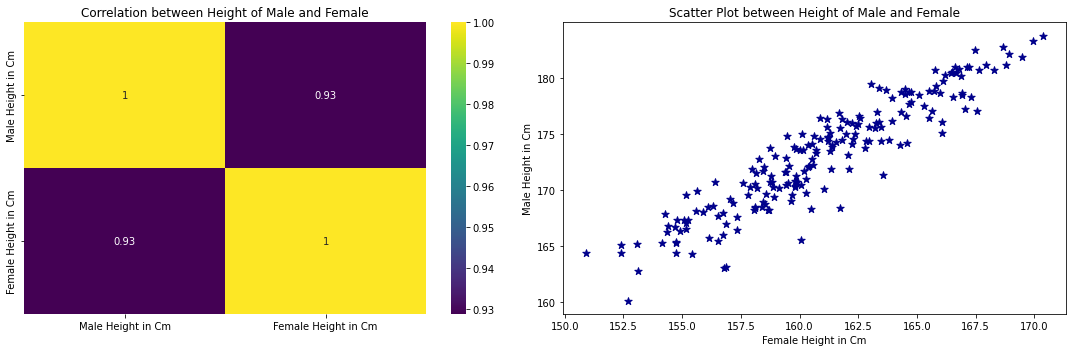

In [19]:
# Lets see the correlation btw Male and Female's height 🐣
fig, ax= plt.subplots(ncols=2, figsize=(15,5))
sns.heatmap(data.iloc[:,2:].corr(),annot=True, ax=ax[0], cmap='viridis')
ax[0].set_title('Correlation between Height of Male and Female')
data.plot.scatter(x='Female Height in Cm', y='Male Height in Cm', color='darkblue', 
                 marker='*', s=60, ax=ax[1])
ax[1].set_title('Scatter Plot between Height of Male and Female')
fig.tight_layout();

In [20]:
# Now, we add 2 new columns to for Country code and Continent that the country belongs 🐩
data['Country Name'].replace('DR Congo','Democratic Republic of the Congo', inplace=True)
data['Country code']= data['Country Name'].apply(lambda x: pc.country_name_to_country_alpha2(x, cn_name_format="default"))
mask= data['Country code']=='TL' 
data=data[~mask]
data['Country continent']= data['Country code'].apply(lambda x: pc.country_alpha2_to_continent_code(x))
data.head(3)

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Country code,Country continent
0,1,Netherlands,183.78,170.36,NL,EU
1,2,Montenegro,183.30,169.96,ME,EU
2,3,Estonia,182.79,168.66,EE,EU


In [21]:
# Create data for the Map visualization 🦉
data3= data.copy()
# Create 1 collumn for country code of alpha3
data3['alpha3']= data3['Country Name'].apply(lambda x: pc.country_name_to_country_alpha3(x))

In [22]:
fig= px.choropleth(data3,locations='alpha3',color='Male Height in Cm',scope='world',
                    title='World Map for Height of Male')
fig.show()

In [23]:
fig= px.choropleth(data3,locations='alpha3',color='Female Height in Cm',scope='world',
                    title='World Map for Height of Female', color_continuous_scale="Viridis")
fig.show()

In [24]:
fig= px.choropleth(data3,locations='alpha3',color='Male Height in Cm',scope='north america',
                    title='North America Map for Height of Male')
fig.show()

In [25]:
fig= px.choropleth(data3,locations='alpha3',color='Female Height in Cm',scope='north america',
                    title='North America Map for Height of Female', color_continuous_scale="Viridis")
fig.show()

In [26]:
fig= px.choropleth(data3,locations='alpha3',color='Male Height in Cm',scope='south america',
                    title='South America Map for Height of Male')
fig.show()


In [27]:
fig= px.choropleth(data3,locations='alpha3',color='Female Height in Cm',scope='south america',
                    title='South America Map for Height of Female', color_continuous_scale="Viridis")
fig.show()

In [28]:
fig= px.choropleth(data3,locations='alpha3',color='Male Height in Cm',scope='europe',
                    title='Europe Map for Height of Male')
fig.show()

In [29]:
fig= px.choropleth(data3,locations='alpha3',color='Female Height in Cm',scope='europe',
                    title='Europe Map for Height of Female', color_continuous_scale="Viridis")
fig.show()

In [30]:
fig= px.choropleth(data3,locations='alpha3',color='Male Height in Cm',scope='africa',
                    title='Africa Map for Height of Male')
fig.show()

In [31]:
fig= px.choropleth(data3,locations='alpha3',color='Female Height in Cm',scope='africa',
                    title='Africa Map for Height of Female', color_continuous_scale="Viridis")
fig.show()

In [32]:
fig= px.choropleth(data3,locations='alpha3',color='Male Height in Cm',scope='asia',
                    title='Asia Map for Height of Male')
fig.show()

In [33]:
fig= px.choropleth(data3,locations='alpha3',color='Female Height in Cm',scope='asia',
                    title='Asia Map for Height of Female', color_continuous_scale="Viridis")
fig.show()

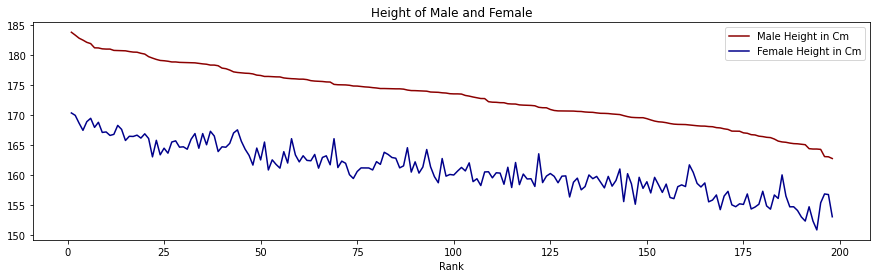

In [34]:
fig, ax=plt.subplots(figsize=(15,4))
data.plot(x='Rank',y=['Male Height in Cm','Female Height in Cm'], ax=ax, color=['darkred', 'darkblue'])
ax.set_title('Height of Male and Female');

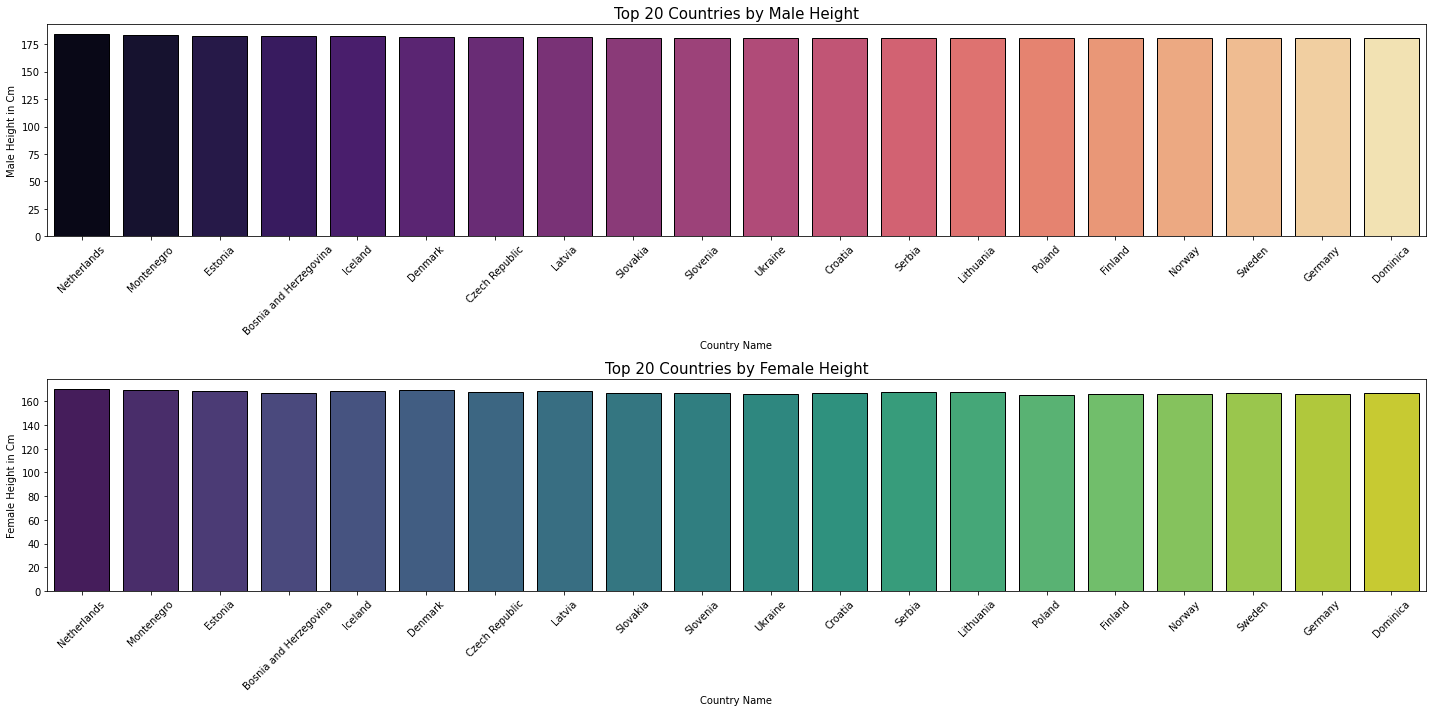

In [35]:
fig, ax=plt.subplots(nrows=2, figsize=(20,10))
sns.barplot(x='Country Name', y='Male Height in Cm', data=data.head(20), palette='magma', edgecolor='black', ax=ax[0])
sns.barplot(x='Country Name', y='Female Height in Cm', data=data.head(20), palette='viridis',edgecolor='black',ax=ax[1])
ax[0].set_title('Top 20 Countries by Male Height', fontsize=15)
ax[1].set_title('Top 20 Countries by Female Height', fontsize=15)
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)
fig.tight_layout()

In [36]:
# Create data for average height by each continent 🐾
data_continent= data.groupby('Country continent')[['Male Height in Cm','Female Height in Cm']].mean()
data_continent

,Male Height in Cm,Female Height in Cm
Country continent,,
AF,170.176538,159.096154
AS,171.203061,158.643673
EU,179.110250,165.705500
NA,174.557308,161.623846
OC,172.518421,162.554211
SA,172.142500,159.118333


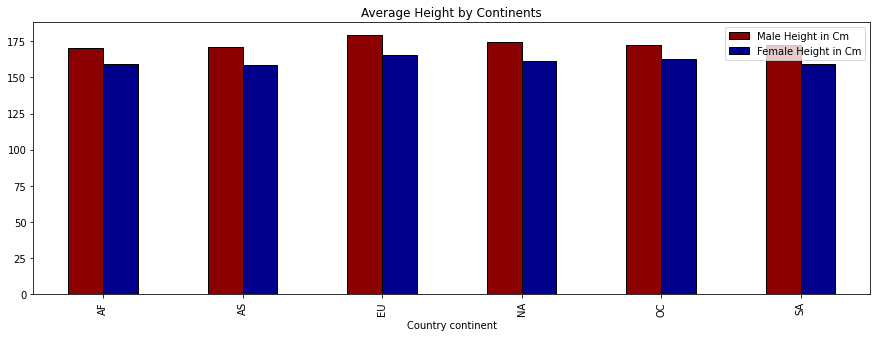

In [37]:
data_continent.plot.bar(figsize=(15,5), color=['darkred', 'darkblue'], edgecolor='black',
                       title='Average Height by Continents');